In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Load the data
df = pd.read_csv('gapminder.csv')

In [4]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


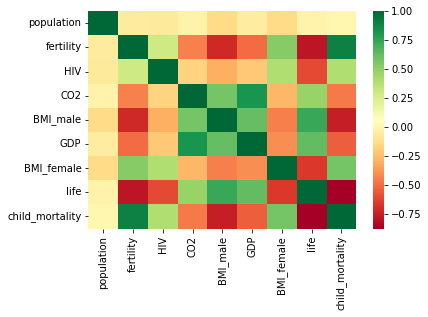

In [5]:
ax = sns.heatmap(df.corr(), cmap='RdYlGn')

0.6192442167740035


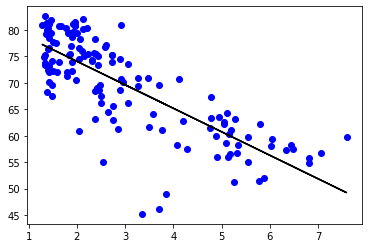

In [6]:
x = df['fertility']
y = df['life']

x = np.array(x)
x = np.reshape(x, (-1, 1))

reg = LinearRegression().fit(x, y)
print(reg.score(x, y))

fig, ax = plt.plot(x, y, 'bo', x, reg.predict(x), '-k')

0.8978171883856773


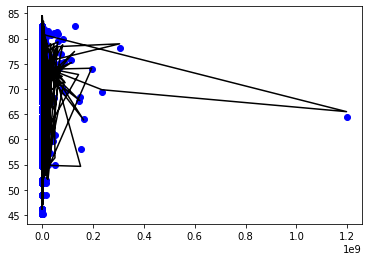

In [7]:
# Include all columns except 'Region' and 'life'
x = df.loc[:, ~df.columns.isin(['Region', 'life'])]
y = df['life']

reg = LinearRegression().fit(x, y)
print(reg.score(x, y))

fix = plt.plot(x, y, 'bo', x, reg.predict(x), '-k')

### The linear regression with all features performed significantly better than the single 'fertility' feature

## Logistic Regression

In [9]:
# load data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds,", len(non_frauds), "nonfrauds.")

492 frauds, 284315 nonfrauds.


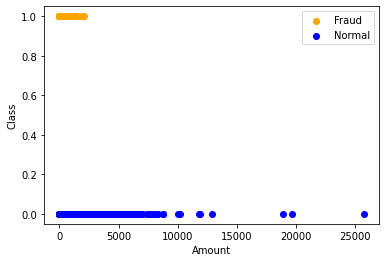

In [11]:
plt.xlabel("Amount")
plt.ylabel("Class")
plt.scatter(frauds.Amount, frauds.Class, c = 'orange', label='Fraud');
plt.scatter(non_frauds.Amount, non_frauds.Class, c = 'blue', label='Normal')
plt.legend(loc="upper right");